<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/CDAs/CDA_mixed_unVar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.4 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [ ]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import scipy.stats as stats
import numpy as np

## load dataset

In [ ]:
df_fruit = pd.read_csv('fruitstore_saleshistory.csv')
df_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207.0,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977.0,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083.0,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766.0,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403.0,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,2018-01-03,수,1,1,303155328,정상회원,과실,과일,단감,단감/무(중:5개),1.0,수지구,상현동,여,63.0,60대,9572.0,매장C,NaN,10:40
6783,2018-01-03,수,1,1,303155328,정상회원,채소,양념채소,양파,양파(1kg),1.0,수지구,상현동,여,63.0,60대,4499.0,매장C,NaN,10:40
6784,2018-01-03,수,1,1,303155328,정상회원,채소,버섯,새송이버섯,새송이버섯(300g),1.0,수지구,상현동,여,63.0,60대,7370.0,매장C,NaN,10:40
6785,2018-01-03,수,1,1,857678016,정상회원,잡곡,유색미/발아미,유색미,흑미(유1kg),1.0,수지구,풍덕천동,여,37.0,30대이하,10721.0,매장C,NaN,10:45


## 이상치, 결측치 확인

In [ ]:
df_fruit.isna().sum()

공급일자           0
요일             0
공급월            0
공급주차           0
회원번호           0
조합원상태          0
물품대분류          0
물품중분류          0
물품소분류          0
물품명            0
구매수량           0
주소-구           0
주소-동           0
성별             1
연령             1
연령대            1
구매금액           1
구매매장           1
반품_원거래일자    6673
구매시각           1
dtype: int64

- 반품_원거래일자의 결측치는 반품을 했는지 안했는지에 따라 구분
- 결측치가 아닌 부분이 반품이므로 해당 데이터는 drop하여 계산

In [ ]:
df_fruit = df_fruit.query('반품_원거래일자.isna() & 성별.notna() & 연령.notna() & 연령대.notna() & 구매금액.notna() & 구매매장.notna() & 구매시각.notna()')
df_fruit.isna().sum()

공급일자           0
요일             0
공급월            0
공급주차           0
회원번호           0
조합원상태          0
물품대분류          0
물품중분류          0
물품소분류          0
물품명            0
구매수량           0
주소-구           0
주소-동           0
성별             0
연령             0
연령대            0
구매금액           0
구매매장           0
반품_원거래일자    6672
구매시각           0
dtype: int64

In [ ]:
df_fruit = df_fruit.query('구매금액 > 0')

In [ ]:
df_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207.0,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977.0,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083.0,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766.0,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403.0,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,2018-01-03,수,1,1,1348267072,정상회원,간식,과자,한과/유과,방울유과(70g),1.0,수지구,풍덕천동,여,36.0,30대이하,5360.0,매장C,NaN,10:36
6782,2018-01-03,수,1,1,303155328,정상회원,과실,과일,단감,단감/무(중:5개),1.0,수지구,상현동,여,63.0,60대,9572.0,매장C,NaN,10:40
6783,2018-01-03,수,1,1,303155328,정상회원,채소,양념채소,양파,양파(1kg),1.0,수지구,상현동,여,63.0,60대,4499.0,매장C,NaN,10:40
6784,2018-01-03,수,1,1,303155328,정상회원,채소,버섯,새송이버섯,새송이버섯(300g),1.0,수지구,상현동,여,63.0,60대,7370.0,매장C,NaN,10:40


## 범주형 / 연속형 : 범주형 따른 관계 확인

### 가설 : channel (항목 2), 구매금액
 - 분석 내용 : 성별(범주형)에 따라 구매한 상품의 단가(연속형) 분산이 같은지 확인
  + 귀무 가설 : 성별과 단가의 차이가 없다 = 서로 동일하게 움직인다 = 정규분포를 따른다
  + 대립 가설 : 성별과 단가의 차이가 있다 = 서로 동일하지 않게 움직인다 = 정규분포를 따르지 않는다

### 상품의 단가에 대한 분산검증

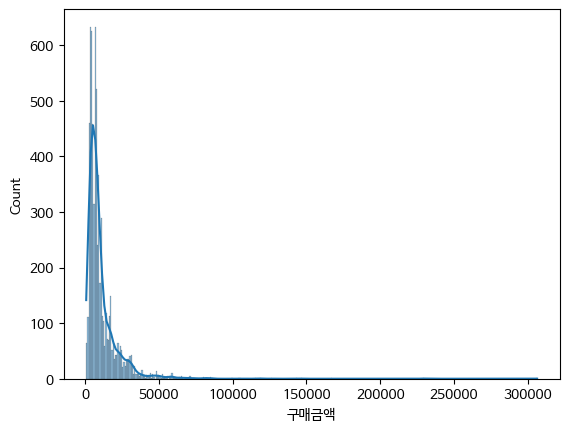

In [ ]:
sns.histplot(df_fruit, x='구매금액', kde=True)
plt.show()

- 데이터의 개수가 6667개 이므로 anderson test 진행

In [ ]:
stats.anderson(df_fruit['구매금액'])

AndersonResult(statistic=632.6372281911517, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=10885.728813559323, scale=12156.91662600922)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

- statistic의 값이 critical_values 기준보다 크므로 귀무가설 기각 => 정규분포를 따르지 않는다.
- 범주형의 항목이 2항목(남,여) 이므로 Wilcoxon test 진행

In [ ]:
df_fruit['성별'].unique()

array(['여', '남'], dtype=object)

### Wilcoxon test

In [ ]:
stats.ranksums(df_fruit.query('성별 == "남"')['구매금액'],df_fruit.query('성별 == "여"')['구매금액'])

RanksumsResult(statistic=-0.9145783630443295, pvalue=0.36041302185819646)

### 분석 결과
- 통계 결론 : 귀무가설 성립 (pvalue > 0.05)
- 사실 결론 : 성별에 따라 구매금액의 차이가 없다. (서로 동일하게 움직인다 => 정규분포로 움직인다)